In [60]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

In [61]:
# Зададим параметры для визуализации графиков по умолчанию
sns.set(
    font_scale = 1,
    style = "whitegrid",
    rc ={'figure.figsize':(15, 7)}
)

# Проект

Анализ данных в стартапе, который создает новый маркетплейс. Он недавно появился на рынке и занимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу.

In [64]:
date_orders = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date']

date_order_items = ['shipping_limit_date']

In [65]:
# Прочитаем данные и преобразуем дату в объект datetime
df_orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=date_orders)
df_order_items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=date_order_items)
df_customers = pd.read_csv('olist_customers_dataset.csv')

### 1. Оценим месячный retention в оформление заказа с помощью когортного анализа.

На первом этапе смотрим на метрики маркетплейса и на возвращаемость клиента в продукт.

Для этого оценим месячный retention в оформление заказа с помощью когортного анализа, так как важно, чтобы клиенты возвращались в маркетплейс для совершения больших покупок.

* Исследуем датасет и определим, какой вид заказа учитывать в retention;
* Построим месячный retention;
* Проанализируем, чему равен медианный retention 1-го месяца;
* Найдем когорту с самым высоким retention на 3-й месяц.

In [67]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [68]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [69]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [70]:
df_orders.shape, df_order_items.shape, df_customers.shape

((99441, 8), (112650, 7), (99441, 5))

In [71]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [72]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [73]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [74]:
# Пример структуры данных по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5
df_order_items.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [75]:
# объединим данные по пользователям и заказам
df_customers_with_orders = df_customers.merge(df_orders, how='left', on='customer_id')

In [76]:
df_customers_with_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [77]:
df_customers_with_orders.shape

(99441, 12)

In [78]:
# проверим количество незаполненных значений
df_customers_with_orders.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [79]:
# посмотрим количество заказов по статусам
df_customers_with_orders.groupby('order_status').order_id.nunique().sort_values()

order_status
approved           2
created            5
processing       301
invoiced         314
unavailable      609
canceled         625
shipped         1107
delivered      96478
Name: order_id, dtype: int64

In [80]:
# количество отмененных заказов из-за проблем с оплатой
df_customers_with_orders[df_customers_with_orders['order_status'] == 'canceled'].order_approved_at.isna().sum()

141

In [81]:
# количество заказов доставленных поздее обещаной даты доставки
df_customers_with_orders['dt_diff'] = (df_customers_with_orders.order_delivered_customer_date - df_customers_with_orders.order_estimated_delivery_date).dt.days
df_customers_with_orders[df_customers_with_orders['dt_diff'] > 0].order_id.count()

6535

In [82]:
# Создаем копию данных, чтобы избежать изменений в исходном DataFrame
data_copy = df_customers_with_orders.copy()

In [83]:
# для рассчета retention будем учитывать доставленные заказы пользователей
data_copy = data_copy.query('order_status =="delivered"')

In [84]:
# Извлекаем месяц и день заказа
data_copy['order_period'] = data_copy['order_purchase_timestamp'].dt.to_period('M')
data_copy['order_period_day'] = data_copy['order_purchase_timestamp'].dt.to_period('D')

In [85]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя
data_copy['cohort'] = data_copy\
                      .groupby('customer_unique_id')['order_purchase_timestamp'] \
                      .transform('min').dt.to_period('M')
data_copy['cohort_day'] = data_copy\
                         .groupby('customer_unique_id')['order_purchase_timestamp'] \
                         .transform('min').dt.to_period('D')

In [86]:
# Рассчитываем номер периода в днях
data_copy['period_number_month'] = np.floor((data_copy.order_period_day - data_copy.cohort_day) \
                                            .apply(attrgetter('n')) / 30)

In [87]:
df_cohort = data_copy.\
            groupby(['cohort', 'period_number_month'])\
            .agg(n_customers=('customer_unique_id', 'nunique'))\
            .reset_index()

In [88]:
df_cohort.head()

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [89]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [90]:
cohort_pivot.head(22)

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Рассчитываем размеры когорт
cohort_size = cohort_pivot.iloc[:, 0]

In [92]:
# Вычисляем коэффициенты удержания
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [93]:
retention_matrix.head(22)

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


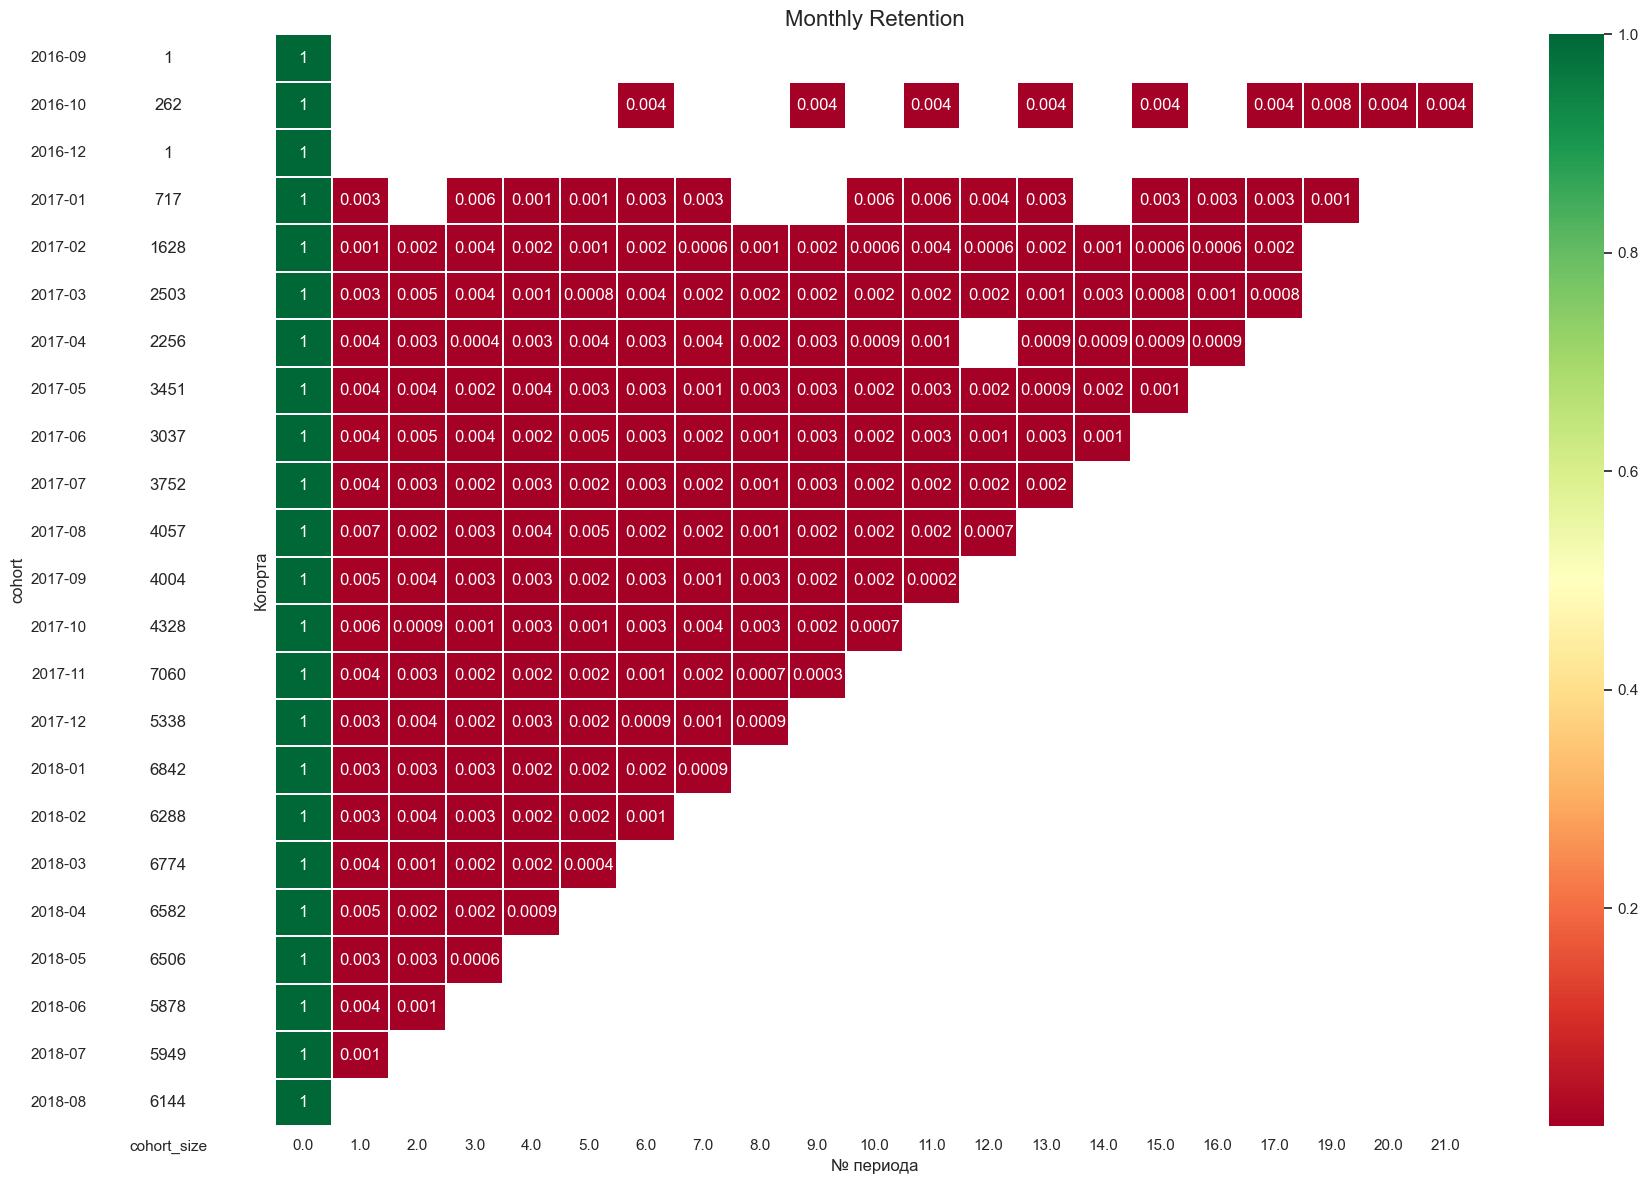

In [94]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(18, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.1g',
                cmap='RdYlGn',
                linewidth=0.1,
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

In [95]:
# медианный retention 1-го месяца
median_first_month = retention_matrix[1.0].median()
print(f"Медианный retention 1-го месяца равен {median_first_month:.4f}")

Медианный retention 1-го месяца равен 0.0035


In [96]:
# Найти когорту с самым высоким retention на 3-й месяц
max_retention_3d_month = retention_matrix[3.0][retention_matrix[3.0] == retention_matrix[3.0].max()]
print(f"Когорта с самым высоким retention на 3-й месяц {retention_matrix[3.0].idxmax()} значение {max_retention_3d_month.iloc[0]:.4f}")

Когорта с самым высоким retention на 3-й месяц 2017-01 значение 0.0056


### 2. Определим существует ли product/market fit у маркетплейса.


#### PMF маркетплейса

***Из результатов, полученых в первой задаче следует, что retention продукта не выходит на плато и имеет значение менее 1%.
То есть клиенты не возвращаются на маркетплейс. Product market fit слабый. Это говорит о том, что большинство новых пользователей не находят достаточной ценности в продукте или услуге, чтобы продолжать использовать его.***

***В ближайшее время маркетплейс должен выяснить причины сложившейся ситуации и увеличивать вовлечение пользователей, поскольку важно не просто привлекать аудиторию, но и удерживать её.***

In [99]:
# Посчитаем сколько пользователей совершило покупку 1 раз
data_copy.query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id' : 'count'}) \
    .query('order_id == 1') \
    .count()

customer_unique_id    90557
order_id              90557
dtype: int64

In [100]:
# Посчитаем сколько пользователей совершило покупку более 1 раза
data_copy.query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id' : 'count'}) \
    .query('order_id > 1') \
    .count()


customer_unique_id    2801
order_id              2801
dtype: int64

***Возможные причины данной ситуации:***

***1. Не соответствие ожиданий клиентов.***

***2. Проблемы с качеством обслуживания.***

***3. Отсутствие необходимых функций и услуг.***


### 3. Определим 5 основных метрик, на которых можно сконцентрироваться, чтобы максимизировать прибыль компании.

Определим 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

* Первая метрика должна отражать рост объёма продаж маркетплейса.
* Вторая — показывать объем аудитории, которой продукт доставляет ценность.
* Третья — отражать заинтересованность новых клиентов в продукте.
* Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.
* Пятая — отражать денежное выражение вовлеченности клиента.
* Визуализируем первую, вторую, четвёртую и пятую метрики.

Основные метрики:
1. Рост объёма продаж маркетплейса: Gross Merchandise Value (GMV) — объём продаж маркетплейса, метрика отражает общий объем продаж через маркетплейс за определенный период. Она показывает, насколько успешно маркетплейс привлекает покупателей и генерирует доход.;
2. Объем аудитории, которой продукт доставляет ценность: PU (Paying Users) — количество платящих пользователей за месяц. Метрика для оценки вовлеченности аудитории и популярности продукта.;
3. Заинтересованность новых клиентов в продукте: CR (Conversion to Paying User) - метрика измеряет процент новых пользователей, которые совершают покупку после первого визита на сайт. Она отражает, насколько эффективно маркетплейс привлекает и конвертирует новых клиентов. Для ее расчета не хвататет данных.
4. Вовлеченность клиента в продолжение использования продукта: Retention Rate — какая доля клиентов вернулась в продукт через определенный период после первого касания. Она помогает понять, насколько хорошо продукт удерживает клиентов и удовлетворяет их потребности.
5. Денежное выражение вовлеченности клиента: ARPPU (Average Revenue Per Paying User) — средняя выручка на платящего пользователя, метрика отражает общую выручку, которую компания получает с одного платящего клиента в среднем.

In [104]:
df_all_orders = df_customers_with_orders.merge(df_order_items, how='left', on='order_id')

In [105]:
df_all_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dt_diff,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,-11.0,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,-8.0,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,-13.0,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,-6.0,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [106]:
df_all_orders['order_period'] = df_all_orders['order_purchase_timestamp'].dt.to_period('M')

In [107]:
# Посчитаем объём продаж маркетплейса по месяцам
gmv = df_all_orders.query('order_status == "delivered"') \
     .groupby('order_period', as_index=False) \
     .agg({'price':'sum'}) \
     .rename(columns={'price': 'month_revenue'})
gmv.head()

,order_period,month_revenue
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40


Text(0.5, 1.0, 'Объём продаж маркетплейса (GMV) по месяцам')

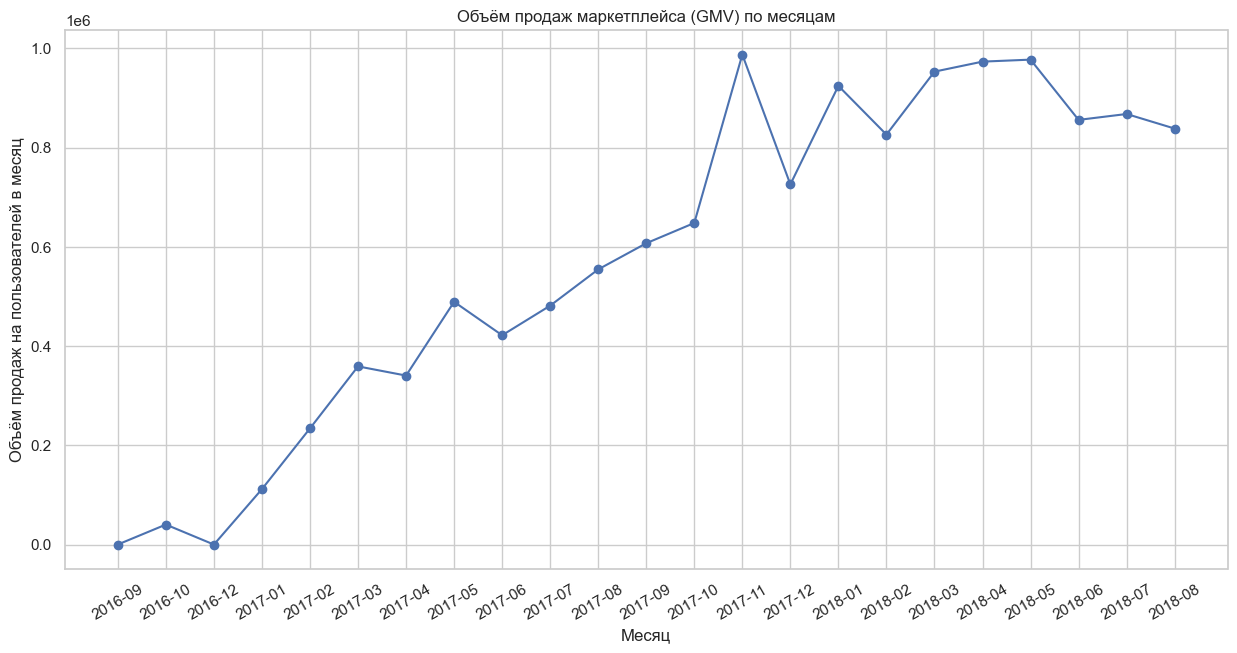

In [108]:
plt.plot(gmv.order_period.dt.strftime('%Y-%m'), gmv.month_revenue, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Объём продаж на пользователей в месяц')
plt.xticks(rotation=30)
plt.title('Объём продаж маркетплейса (GMV) по месяцам')


In [109]:
# Посчитаем количество платящих пользователей (PU) по месяцам
pu = df_all_orders.query('order_status == "delivered"') \
     .groupby('order_period', as_index=False) \
     .agg({'customer_unique_id': 'nunique'}) \
     .rename(columns={'customer_unique_id': 'paying_user'})
pu.head()

,order_period,paying_user
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,718
4,2017-02,1630


Text(0.5, 1.0, 'Количество платящих пользователей (MAU) по месяцам')

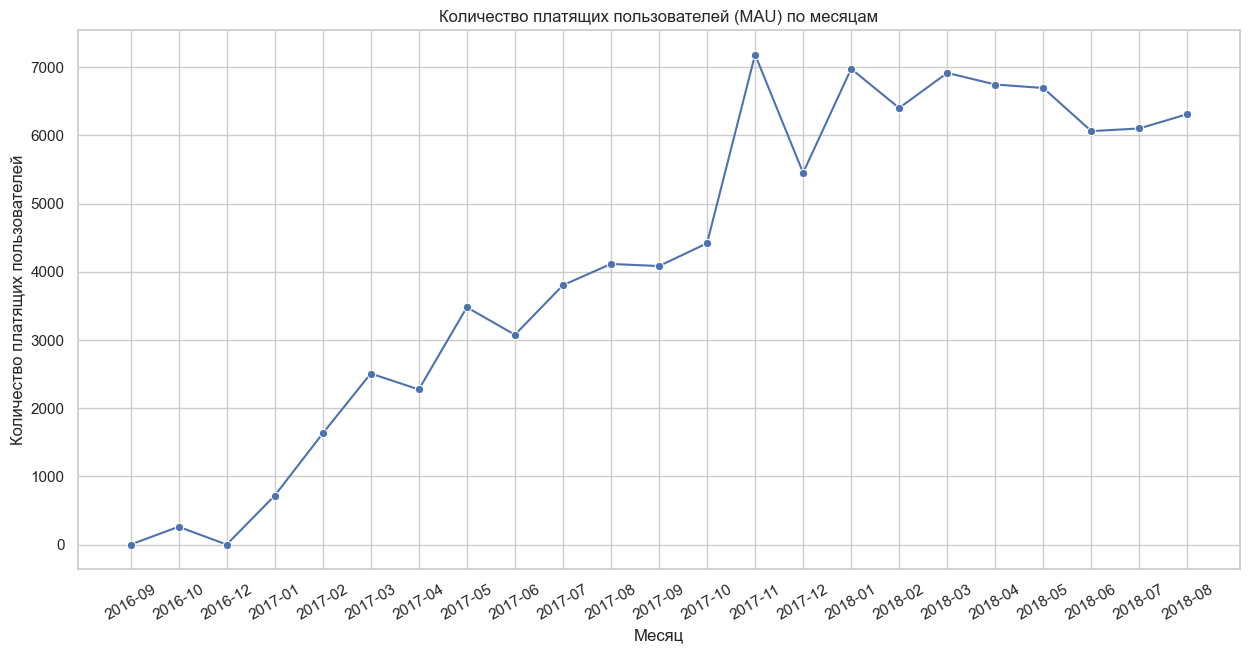

In [110]:
sns.lineplot(x=pu.order_period.dt.strftime('%Y-%m'), y="paying_user", data=pu, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Количество платящих пользователей')
plt.xticks(rotation=30)
plt.title('Количество платящих пользователей (MAU) по месяцам')

Text(0.5, 1.0, 'Retention Rate 1-го месяца')

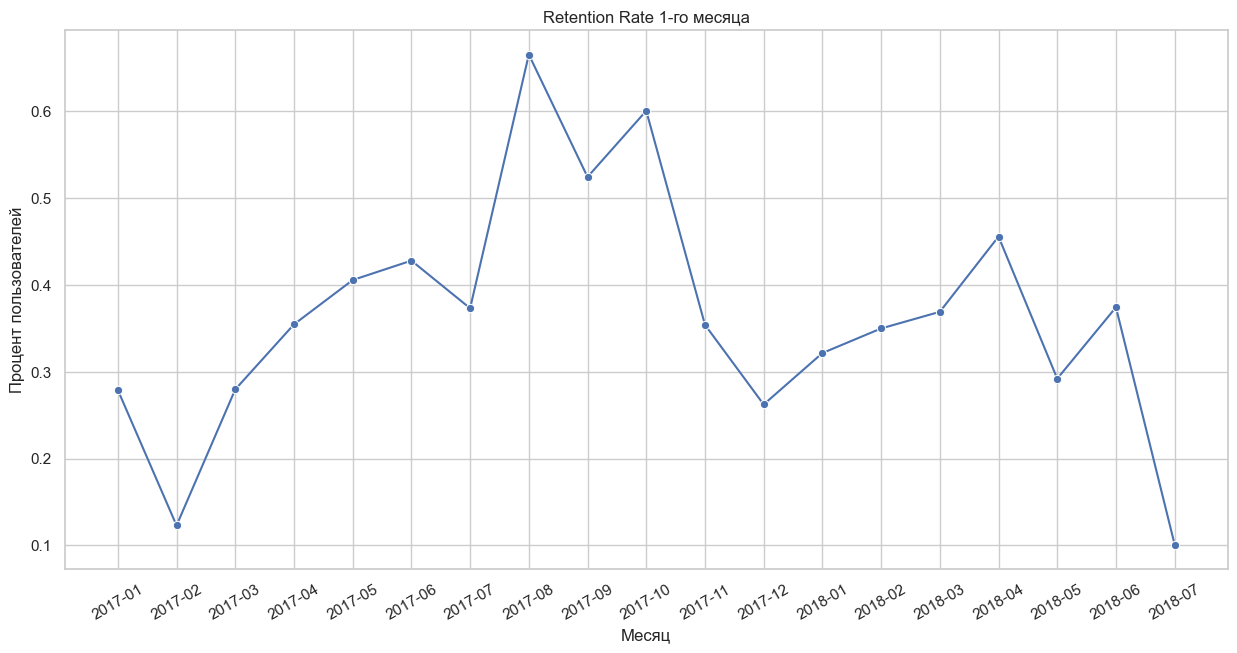

In [111]:
sns.lineplot(
    x=retention_matrix.index.strftime('%Y-%m'),
    y=retention_matrix.iloc[:, 1].mul(100),
    data=retention_matrix, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Процент пользователей')
plt.xticks(rotation=30)
plt.title('Retention Rate 1-го месяца')

In [112]:
df_arppu = gmv.merge(pu, on='order_period')

In [113]:
# Посчитаем среднюю выручку на одного пользователя (ARPPU) по месяцам
df_arppu['arppu'] = df_arppu.month_revenue / df_arppu.paying_user
df_arppu.head()

,order_period,month_revenue,paying_user,arppu
0,2016-09,134.97,1,134.970000
1,2016-10,40325.11,262,153.912634
2,2016-12,10.90,1,10.900000
3,2017-01,111798.36,718,155.708022
4,2017-02,234223.40,1630,143.695337


Text(0.5, 1.0, 'Средняя выручка на одного платящего пользователя (ARPPU) по месяцам')

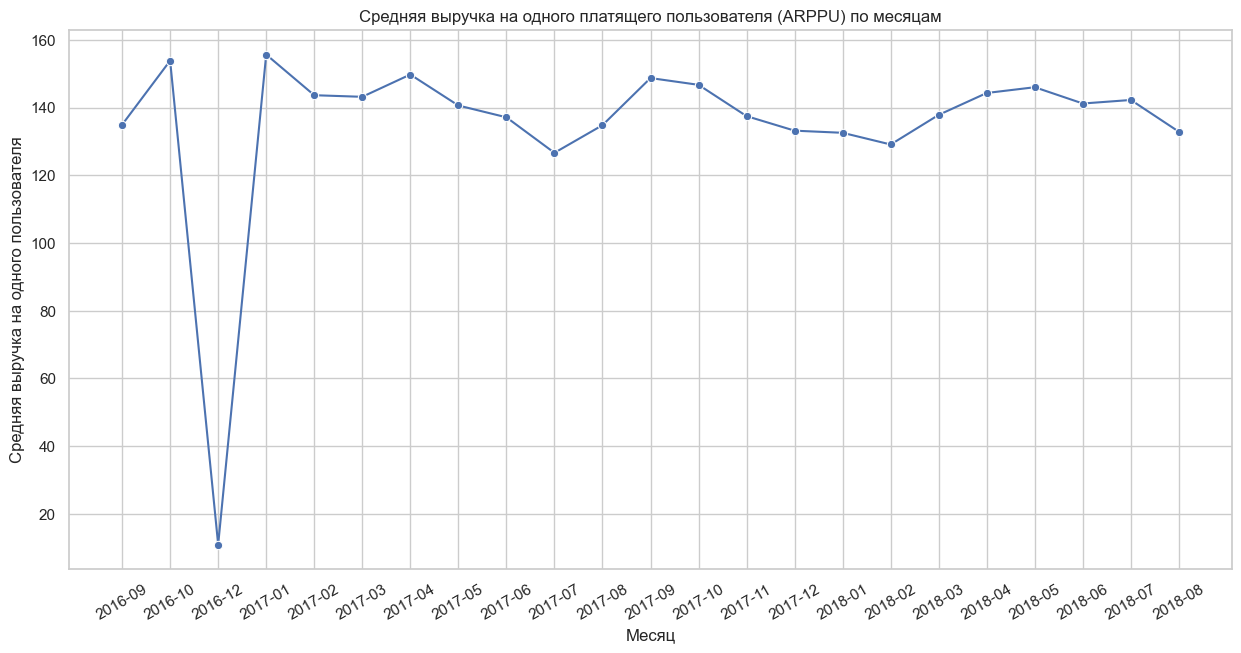

In [114]:
sns.lineplot(x=df_arppu.order_period.dt.strftime('%Y-%m'), y='arppu', data=df_arppu, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Средняя выручка на одного пользователя')
plt.xticks(rotation=30)
plt.title('Средняя выручка на одного платящего пользователя (ARPPU) по месяцам')

### 4. Выбор одной из 3 основных гипотез с помощью фреймворка ICE.

По каждой гипотезе команда заполнила показатели по Ease, Confidence. Вам нужно заполнить самый важный показатель — Impact. Для этого вам требуется:

Выбрать одну из трёх основных гипотез с помощью фреймворка ICE, которые были сформированы продактом и, кажется, должны улучшить пользовательский опыт в маркетплейсе.

Для расчёта Impact берем данные с июня 2017 года. Считайте, что конверсия в повторный заказ равна величине медианного retention 1-го месяца (см. пункт 1 проекта).

In [116]:
def impact(i):
    if 0 < i < 50:
        return 1
    elif 51 <= i <= 150:
        return 2
    elif 151 <= i <= 350:
        return 3
    elif 351 <= i <= 750:
        return 4
    elif 751 <= i <= 1550:
        return 5
    elif 1551 <= i <= 3150:
        return 6
    elif 3151 <= i <= 6350:
        return 7
    elif 6351 <= i <= 12750:
        return 8
    elif 12751 <= i <= 25550:
        return 9
    else:
        return 10
    

#### Гипотеза 1.
Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

In [118]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [119]:
# Посчитаем impact для 1 гипотезы
hpots_1 = df_orders.query('order_status == "canceled"| order_status == "unavailable" & order_purchase_timestamp >= "2017-06-01" ').order_id.nunique()
hpots_1

1100

In [120]:
print(f"Impact для первой гипотезы равен {impact(hpots_1)}.")

Impact для первой гипотезы равен 5.


In [121]:
ice_hpots_1 = impact(hpots_1) * 8 * 6
print(f"ICE для первой гипотезы равен {ice_hpots_1}.")

ICE для первой гипотезы равен 240.


#### Гипотеза 2
Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 

In [123]:
data_impact = df_orders.query("order_delivered_customer_date > '2017-06-01'")

In [124]:
overdue_days = (
    data_impact['order_delivered_customer_date'] - data_impact['order_estimated_delivery_date']) \
    .apply(attrgetter('days'))
overdue_days

0        -8
1        -6
2       -18
3       -13
4       -10
         ..
99433   -18
99437    -2
99438    -6
99439   -21
99440   -18
Length: 86588, dtype: int64

In [125]:
hpots_2 = overdue_days[overdue_days > 0].shape[0] * 0.0035
hpots_2


21.7315

In [126]:
print(f"Impact для второй гипотезы равен {impact(hpots_2)}.")

Impact для второй гипотезы равен 1.


In [127]:
ice_hpots_2 = impact(hpots_2) * 10 * 4
print(f"ICE для второй гипотезы равен {ice_hpots_2}.")


ICE для второй гипотезы равен 40.


#### Гипотеза 3
Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [129]:
all_users = df_all_orders.query("order_delivered_customer_date >= '2017-06-01'").groupby('customer_unique_id').order_id.nunique().reset_index()
one_order_count = all_users[all_users['order_id'] == 1].order_id.sum()

In [130]:
hpots_3 = one_order_count * 0.0035
round(hpots_3)

286

In [131]:
print(f"Impact для второй гипотезы равен {impact(hpots_3)}.")

Impact для второй гипотезы равен 3.


In [132]:
ice_hpots_2 = impact(hpots_3) * 5 * 9
print(f"ICE для второй гипотезы равен {ice_hpots_2}.")

ICE для второй гипотезы равен 135.


***Выбираем гипотезу один: если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится.***

#### 5. Сформулировать нужные метрики, на которые должна повлиять гипотеза.

Сформулируем метрики, на которые должна повлиять выбраннаягипотеза - целевые, прокси, guardrail.

* ***Целевая метрика: Количество доставленных заказов.*** 
* ***Прокси-метрики: Конверсия в доставку товара до покупателя.***
* ***Guardrail-метрики: Конверсия в оформление заказа.***

#### 6. Результаты проведённой работы с компанией.

**Проблема продукта**:  выручка маркетплейса не растет несколько месяцев.

**Выводы пункта 1:** Месячный retention в оформление заказа имеет значение всего 0.3%. Пользователи уходят с маркетплейса после 1-го заказа. У нашего продукта низкая вовлеченность.

**Выводы пункта 2:** Из результатов, полученных с помощью когортного анализа на предыдущем шаге следует, что коэффициент удежания имеет значение менее 1% и клиенты не возвращаются на маркетплейс. Product market fit отсутствует, продукт не соответствует потребностям и интересам потенциальных покупателей.Возможные причины данной ситуации: 1.Не соответствие ожиданий клиентов. 2.Проблемы с качеством обслуживания.3.Отсутствие необходимых функций и услуг.
  
**Выводы пункта 3:** Выделены 5 основных метрик, на которых можно сконцентрироваться, чтобы максимизировать прибыль компании:
  - Gross Merchandise Value (GMV) — объём продаж маркетплейса;
  - Paying Users — количество платящих пользователей за месяц.;
  - Conversion to Paying User - метрика измеряет процент новых пользователей, которые совершают покупку после первого визита на сайт (для расчета необходимы доп.данные;
  - Retention Rate — какая доля клиентов вернулась в продукт через определенный период после первого касания.
  - Average Revenue Per Paying User — средняя выручка на платящего пользователя.
 
 **Выводы пункта 4:** Для увеличения метрик с помощью фреймворка ICE выбрана Гипотеза №1 "Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.";

**Выводы пункта 5:** Выбранная гипотеза значительно улучшит следующие метрики компании:
  - Целевая метрика: Количество доставленных заказов. Цель: Оценить, увеличилось ли количество успешных доставок после исправления бага. Это основная метрика, которая непосредственно отражает успех гипотезы.
  - Прокси-метрики: Конверсия в доставку товара до покупателя. Общее количество заказов, которые были доставлены клиентам / Общее количество заказов. Цель: Измерить снижение числа отмен после исправления бага. Эта метрика служит индикатором того, насколько эффективно работает система после внесения изменений.
  - Guardrail-метрики:Конверсия в оформление заказа. Доля клиентов, которые оформили заказ, деленная на количество активной аудитории Цель: Убедиться, что исправление бага не негативно сказалось на общем восприятии клиента совершить следующий заказ. ;

**Общие выводы:** По итогу исследования отсутствия роста выручки выявлено, что retention продукта имеет значение менее 1%. То есть клиенты не возвращаются на маркетплейс. Product market fit отсутствует. Маркетплейсу необходимо не только привлекать аудиторию, но и удерживать её.  Чтобы максимизировать прибыль компании необходимо сосредоточиться на решении проблем с качеством клиентского обслуживания. Для улучшения качества обслужвания, с помощью фреймворка ICE была выбрана Гипотеза №1 "Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен." ;

  **Рекомендации по продукту:**
  - Для улучшения качества обслуживания и удержания клиентов рекомендовано исправить баг в системе процессинга заказов.   

